# Pymaceuticals Inc.
---

### Analysis

This animal experiment included 249 mice who were identified with SCC tumors and were treated with ten different drug regimens. The duration of this experiment was a total of 45 days. During this experiment we can see that the drug Capomulin and Ramicane had very similar data when it came to reducing tumors. 

Even though the gender of the mice were split close to 50/50 we are not able to determine if the drugs impacted the mice due to their gender. However we were able to determine that the mice’s weight impact the outcome of the drug regimens.

After reviewing the data we can determine that the correlation between the mouse weight and the average tumor is approximately 84%. The less the mice weighed the average tumor volume decreased. 

 In conclusion Ramicane worked slightly better than Capomulin but overall Capomulin was the top second drug to decrease tumors out of the ten drug regimens that were used in this experiment.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "C:/Users/Joanna/Desktop/Data_Visualization_Challenge/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "C:/Users/Joanna/Desktop/Data_Visualization_Challenge/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df= pd.merge(mouse_metadata, study_results, on='Mouse ID', how="left",)

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_number= len(merge_df['Mouse ID'].unique())
mice_number

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicate = merge_df.loc[merge_df.duplicated(subset = ["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
mice_duplicate

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_table=merge_df[merge_df.duplicated(subset=["Mouse ID","Timepoint"])]
duplicate_table

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_df= pd.DataFrame(merge_df.drop_duplicates(subset=["Mouse ID", "Timepoint"]))
clean_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_data=len(clean_study_df["Mouse ID"].unique())
clean_data

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
regimen_grouped = clean_study_df.groupby('Drug Regimen')
tumor_mean = regimen_grouped["Tumor Volume (mm3)"].mean()
tumor_median = regimen_grouped["Tumor Volume (mm3)"].median()
tumor_variance = regimen_grouped["Tumor Volume (mm3)"].var()
tumor_stdev = regimen_grouped["Tumor Volume (mm3)"].std()
tumor_sem = regimen_grouped["Tumor Volume (mm3)"].sem()
 
# Assemble the resulting series into a single summary DataFrame.
summary_df= pd.DataFrame({"Mean Tumor Volume (mm3)": tumor_mean, 
                           "Median Tumor Volume (mm3)":tumor_median, 
                           "Variance Tumor Volume (mm3)":tumor_variance, 
                           "Std.Dev. Tumor Volume (mm3)":tumor_stdev, 
                            "SEM Tumor Volume (mm3)": tumor_sem})
summary_df

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Std.Dev. Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
regimen_summary = regimen_grouped[["Tumor Volume (mm3)"]].agg(['mean', 'median', 'var', 'std', 'sem'])
regimen_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

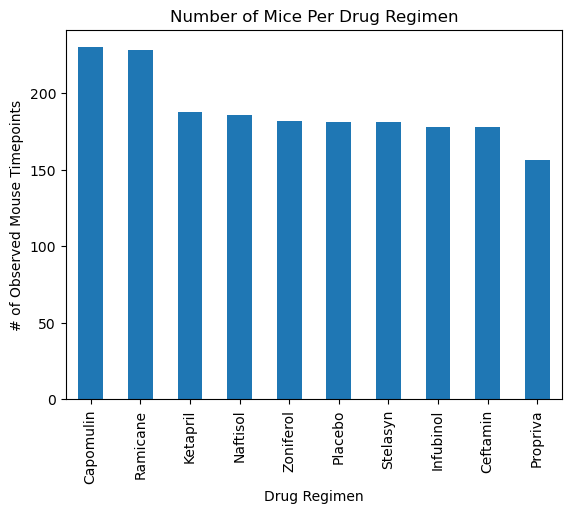

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pandasBar = clean_study_df["Drug Regimen"].value_counts().plot.bar()
pandasBar.set_xlabel("Drug Regimen")
pandasBar.set_ylabel("# of Observed Mouse Timepoints")
plt.title("Number of Mice Per Drug Regimen")
plt.show()

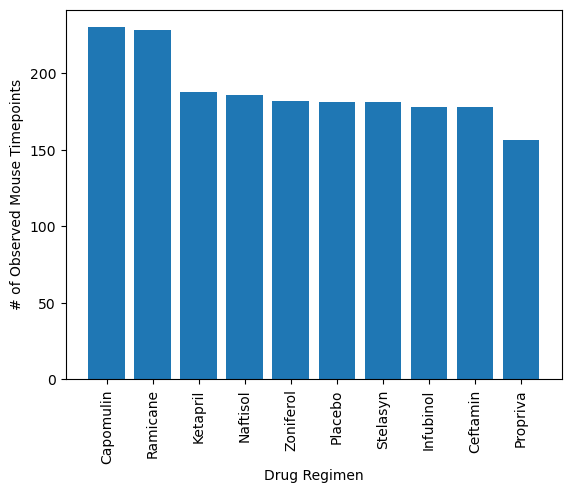

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = clean_study_df["Drug Regimen"].value_counts().index.values
y_axis = clean_study_df["Drug Regimen"].value_counts().values

plt.bar(x_axis, y_axis, align = 'center')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = "vertical")
plt.show()

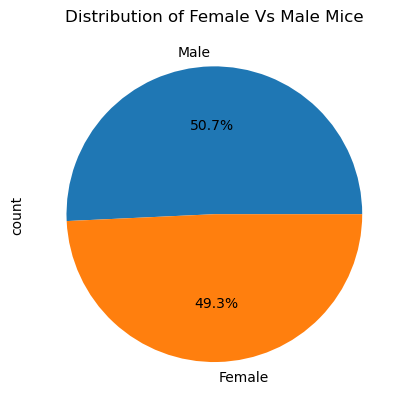

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = clean_study_df["Sex"].value_counts()
mice_gender.plot.pie(autopct = "%1.1f%%")

#Create Title
plt.title("Distribution of Female Vs Male Mice")
plt.show()

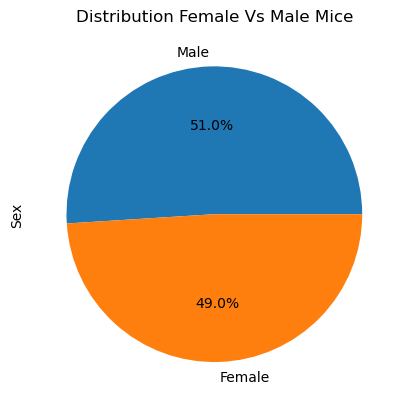

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = [51, 49]
plt.pie(sizes, labels = labels, autopct = "%1.1f%%")
plt.ylabel("Sex")

# Create Title
plt.title("Distribution Female Vs Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
final_tumor_vol =clean_study_df.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]
final_tumor_df = final_tumor_vol.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_study_df= pd.merge(final_tumor_vol, clean_study_df, on = ["Mouse ID", "Timepoint", "Tumor Volume (mm3)"], how = "left")
merge_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen,Sex,Age_months,Weight (g),Metastatic Sites
0,b128,45,38.982878,Capomulin,Female,9,22,2
1,b742,45,38.939633,Capomulin,Male,7,21,0
2,f966,20,30.485985,Capomulin,Male,16,17,0
3,g288,45,37.074024,Capomulin,Male,3,19,1
4,g316,45,40.159220,Capomulin,Female,22,22,2


In [14]:
# Put treatments into a list for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol_data_list= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol_data = merge_study_df.loc[merge_study_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    final_tumor_vol_data_list.append(final_tumor_vol_data)

    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol_data.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol_data.loc[(final_tumor_vol_data< lower_bound) | (final_tumor_vol_data > upper_bound)]
    
    #Print out the results
    print(f"{drug}'s potential outliers: {outliers}")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 55    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


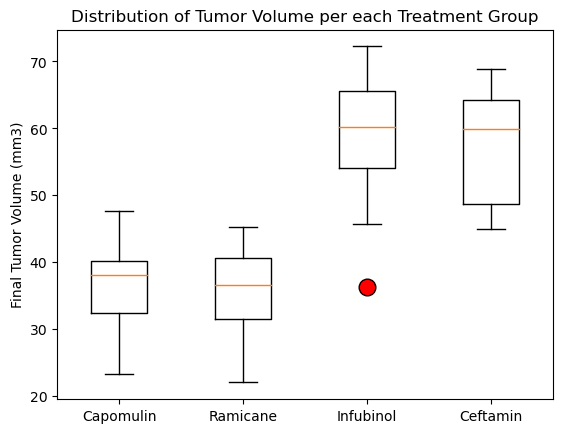

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(final_tumor_vol_data_list, flierprops = dict(markerfacecolor = "red", marker = "o", markersize = 12))
plt.xticks([1,2,3,4], treatment_list)
plt.title("Distribution of Tumor Volume per each Treatment Group")
plt.show()

## Line and Scatter Plots

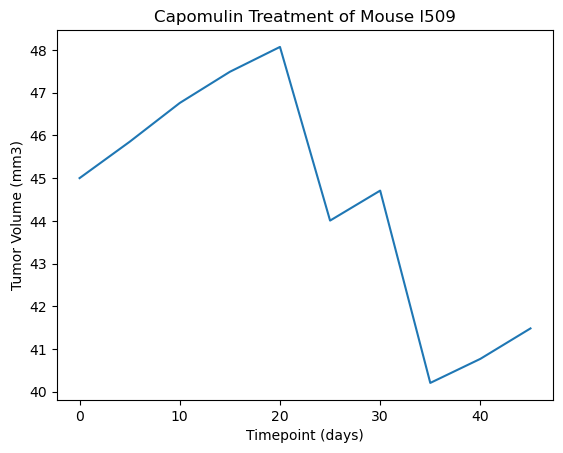

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509 = clean_study_df.loc[clean_study_df["Mouse ID"] == "l509"]

x_axis = mouse_l509["Timepoint"]
y_axis = mouse_l509["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

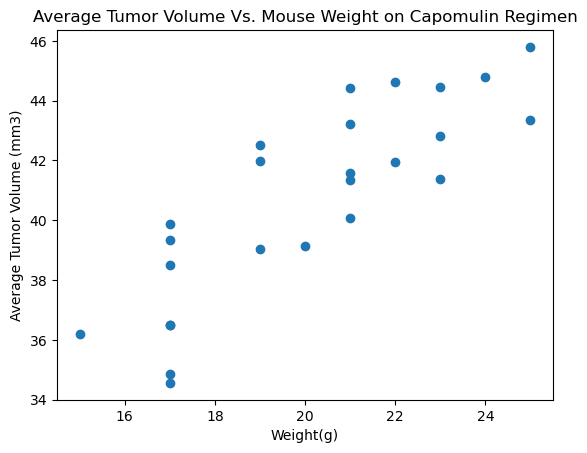

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_regimen = clean_study_df.loc[clean_study_df["Drug Regimen"] == "Capomulin"]
capomulin_avg = capomulin_regimen.groupby(["Mouse ID"])
x_weight = capomulin_avg["Weight (g)"].mean()
y_vol = capomulin_avg["Tumor Volume (mm3)"].mean()
plt.scatter(x_weight, y_vol)
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight(g)")
plt.title("Average Tumor Volume Vs. Mouse Weight on Capomulin Regimen")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


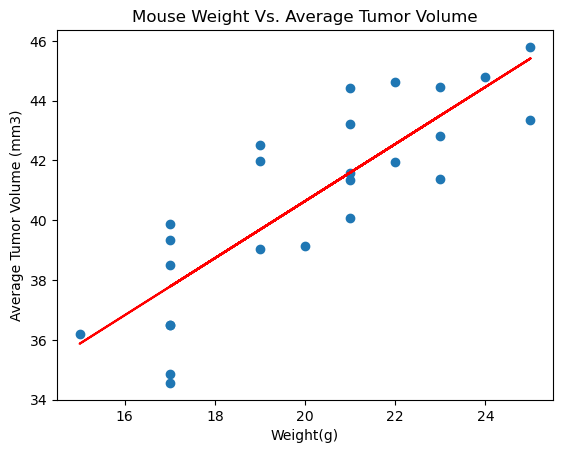

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_weight, y_vol)
regress_values = x_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_weight,y_vol)
plt.plot(x_weight,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight Vs. Average Tumor Volume")
print(f"The correlation between mouse weight and the average tumor volume is {rvalue:.2f}")
plt.show()